# import

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('./glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
# check for null 
df.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

No Empty Fields

# Viz

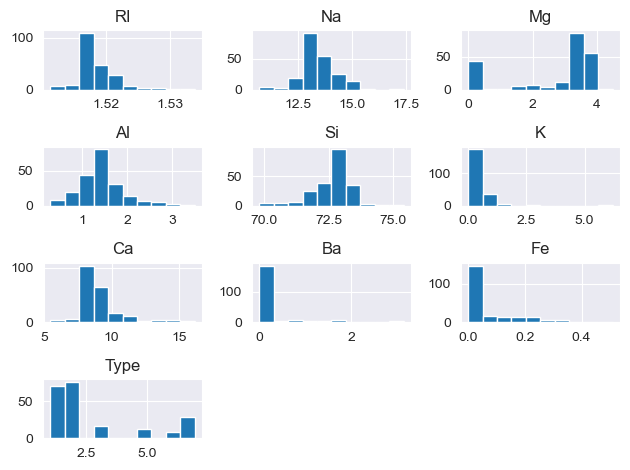

In [5]:
df.hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='RI', ylabel='Na'>

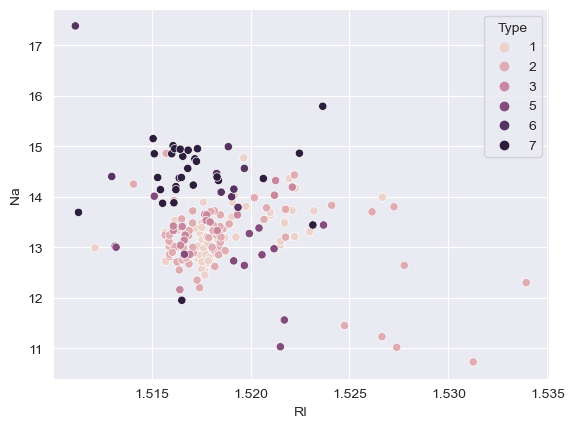

In [7]:
sns.scatterplot(data=df,x='RI',y='Na',hue='Type')

<Axes: xlabel='Mg', ylabel='Na'>

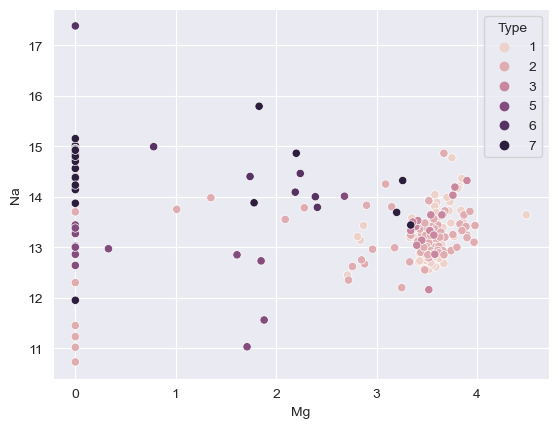

In [10]:
sns.scatterplot(data=df,x='Mg',y='Na',hue='Type')

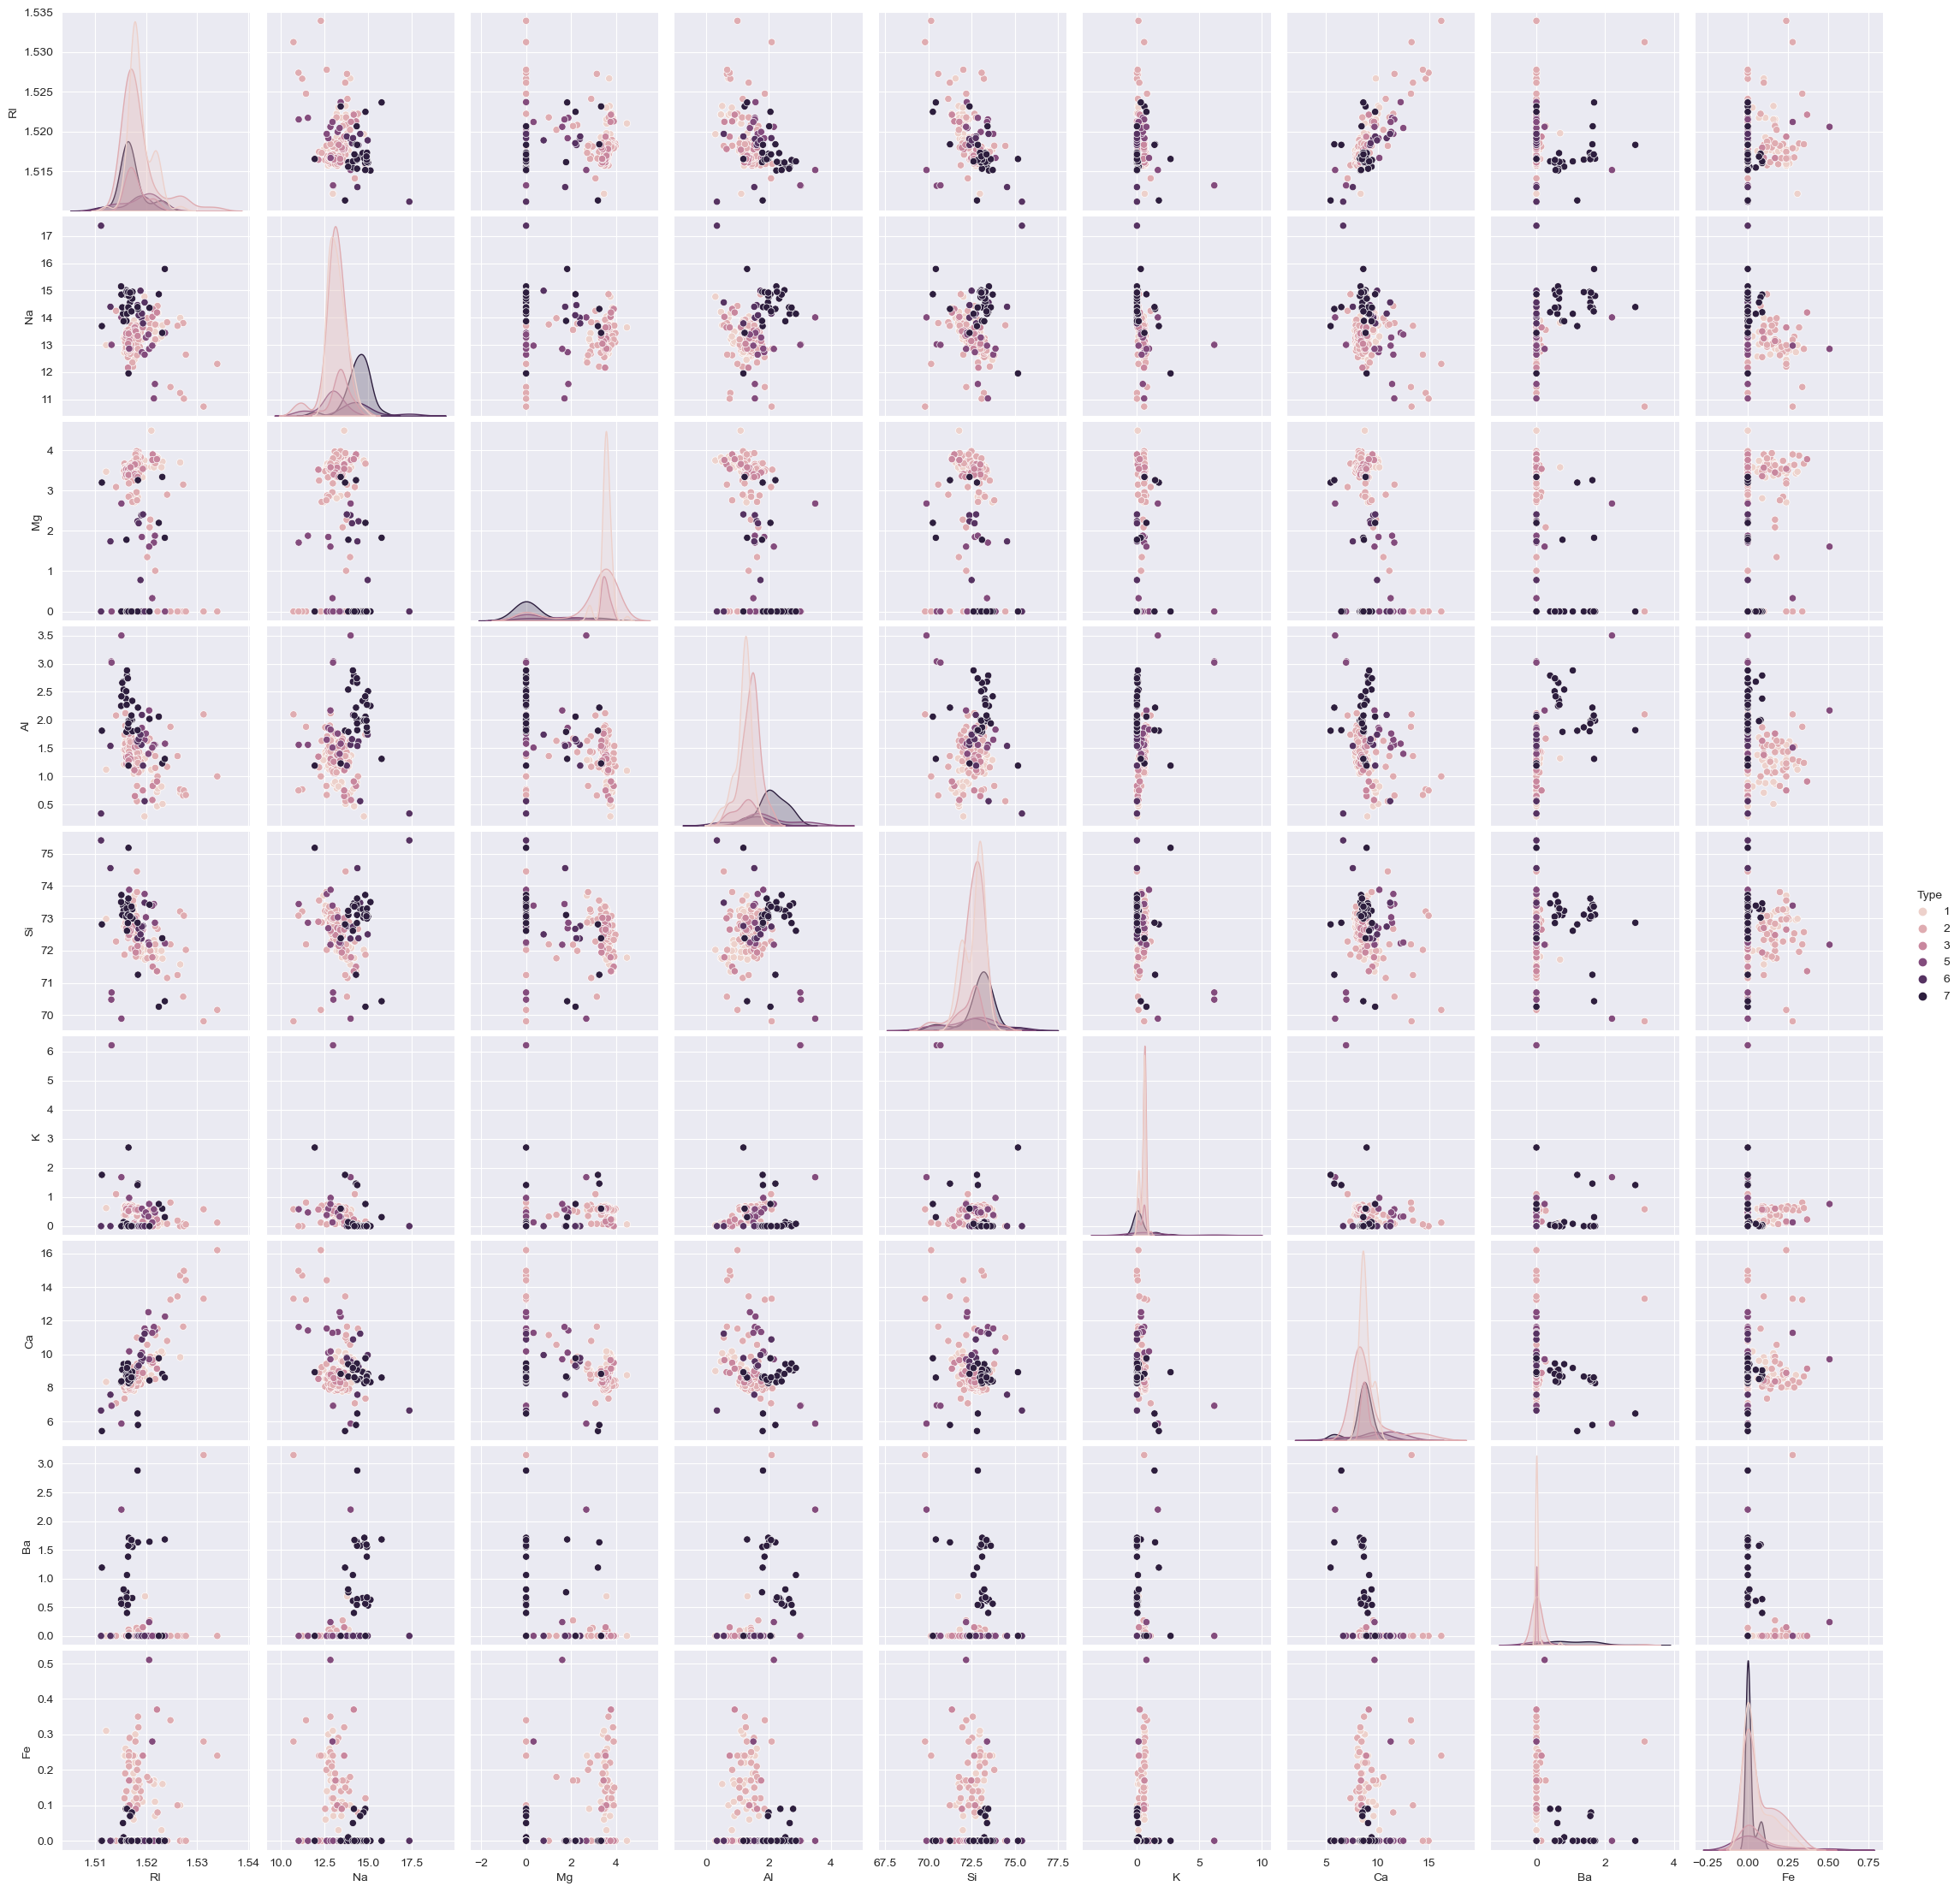

In [11]:
sns.pairplot(df,hue='Type')

<Axes: xlabel='Type', ylabel='count'>

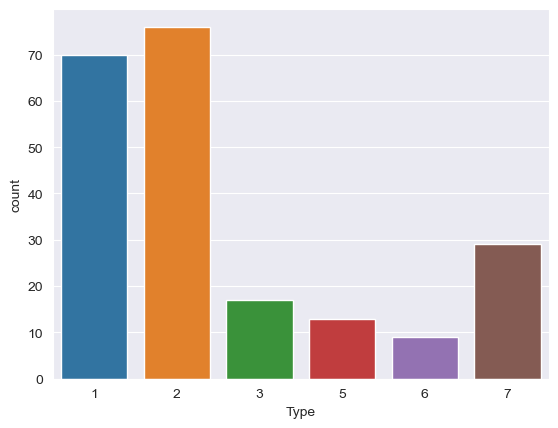

In [12]:
sns.countplot(df,x='Type')

# KNN

In [13]:
X = df.drop('Type',axis=1)
Y = df['Type']

In [14]:
# perform scaling
sc = StandardScaler()
scaled = sc.fit_transform(X)
scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [15]:
# split the data
xtrain , xtest , ytrain , ytest = train_test_split(scaled,Y,test_size=0.2,random_state=42)

# Model

In [16]:
knn = KNeighborsClassifier().fit(xtrain,ytrain)

In [17]:
print('\033[91m Train Report')
print(classification_report(ytrain,knn.predict(xtrain)))

 Train Report
              precision    recall  f1-score   support

           1       0.71      0.88      0.79        59
           2       0.78      0.79      0.78        62
           3       0.75      0.21      0.33        14
           5       0.75      0.67      0.71         9
           6       1.00      0.67      0.80         6
           7       0.89      0.81      0.85        21

    accuracy                           0.77       171
   macro avg       0.81      0.67      0.71       171
weighted avg       0.77      0.77      0.75       171



In [18]:
ypred = knn.predict(xtest)

In [19]:
print('\033[92m Test Report')
print(classification_report(ytest,ypred))

 Test Report
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43



In [20]:
print('Training accuracy: ', knn.score(xtrain,ytrain))
print('Testing Accuracy: ', knn.score(xtest,ytest))

Training accuracy:  0.7660818713450293
Testing Accuracy:  0.6976744186046512


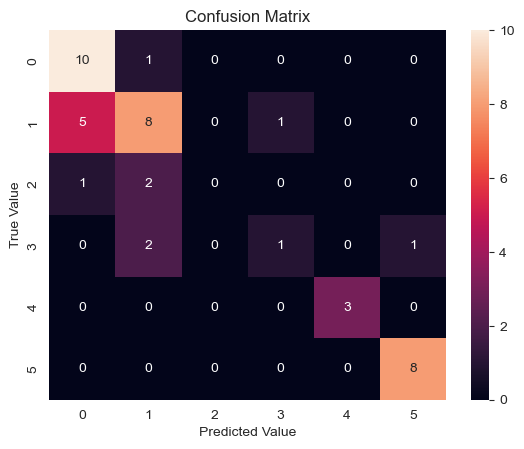

In [21]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# Hyper Parameter Tuning

In [22]:
train_acc = []
test_acc = []
for i in range(1,50):
    tknn = KNeighborsClassifier(n_neighbors=i)
    tknn.fit(xtrain,ytrain)
    print(f'For neighbour = {i}')
    print(f"Train Accuracy : {tknn.score(xtrain,ytrain)}")
    print(f"Test Accuracy : {tknn.score(xtest,ytest)} \n")
    train_acc.append(tknn.score(xtrain,ytrain))
    test_acc.append(tknn.score(xtest,ytest))

For neighbour = 1
Train Accuracy : 1.0
Test Accuracy : 0.7674418604651163 

For neighbour = 2
Train Accuracy : 0.8245614035087719
Test Accuracy : 0.6744186046511628 

For neighbour = 3
Train Accuracy : 0.8187134502923976
Test Accuracy : 0.7674418604651163 

For neighbour = 4
Train Accuracy : 0.7894736842105263
Test Accuracy : 0.7441860465116279 

For neighbour = 5
Train Accuracy : 0.7660818713450293
Test Accuracy : 0.6976744186046512 

For neighbour = 6
Train Accuracy : 0.7543859649122807
Test Accuracy : 0.6511627906976745 

For neighbour = 7
Train Accuracy : 0.7192982456140351
Test Accuracy : 0.7209302325581395 

For neighbour = 8
Train Accuracy : 0.7251461988304093
Test Accuracy : 0.6511627906976745 

For neighbour = 9
Train Accuracy : 0.7076023391812866
Test Accuracy : 0.627906976744186 

For neighbour = 10
Train Accuracy : 0.7017543859649122
Test Accuracy : 0.627906976744186 

For neighbour = 11
Train Accuracy : 0.7017543859649122
Test Accuracy : 0.6511627906976745 

For neighbour 

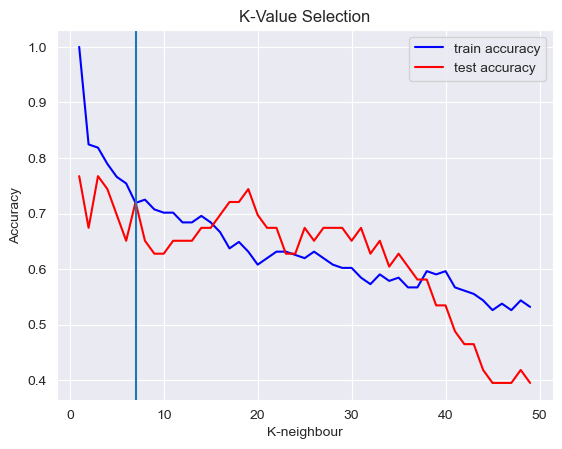

In [24]:
plt.plot(range(1,50),train_acc,color='blue',label='train accuracy')
plt.plot(range(1,50),test_acc,color='red',label='test accuracy')
plt.xlabel('K-neighbour')
plt.ylabel('Accuracy')
plt.axvline(7)
plt.legend()
plt.title('K-Value Selection')
plt.show()

*Using n=7 since line intersect and accuracy is also high*

# Final Model

In [25]:
fknn = KNeighborsClassifier(n_neighbors=7).fit(xtrain,ytrain)

In [26]:
print('\033[91m Train Report')
print(classification_report(ytrain,fknn.predict(xtrain)))

 Train Report
              precision    recall  f1-score   support

           1       0.65      0.88      0.75        59
           2       0.74      0.74      0.74        62
           3       0.50      0.07      0.12        14
           5       0.80      0.44      0.57         9
           6       1.00      0.50      0.67         6
           7       0.89      0.81      0.85        21

    accuracy                           0.72       171
   macro avg       0.76      0.57      0.62       171
weighted avg       0.72      0.72      0.70       171



In [27]:
print('\033[92m Test Report')
print(classification_report(ytest,fknn.predict(xtest)))

 Test Report
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.64      0.64      0.64        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.69      0.63      0.62        43
weighted avg       0.70      0.72      0.68        43



In [28]:
print('Training accuracy: ', fknn.score(xtrain,ytrain))
print('Testing Accuracy: ', fknn.score(xtest,ytest))

Training accuracy:  0.7192982456140351
Testing Accuracy:  0.7209302325581395


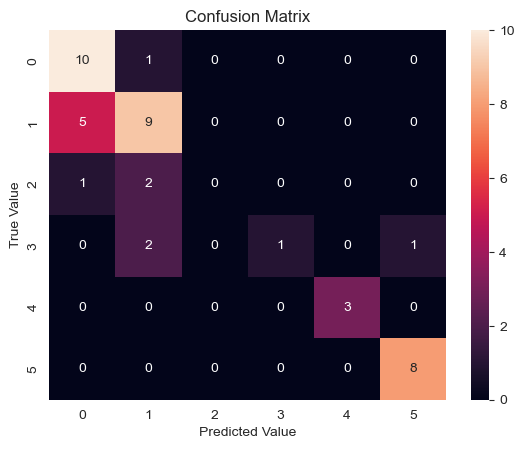

In [29]:
sns.heatmap(confusion_matrix(ytest,fknn.predict(xtest)),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

*The Accuracy decreased from our baseline model but the final model is generalized and gives stable prediction*